In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
file = r"D:\internship\Projects\Crop Production data\Crop Production data.csv"

df = pd.read_csv(file)

In [31]:
df.head(5)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [32]:
df.shape

(246091, 7)

In [33]:
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [35]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [36]:
# df.fillna(df['Production'].mean,inplace = True)

df['Production'].fillna(df['Production'].mean(), inplace=True)


In [39]:
# df.info()

In [38]:
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [14]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

# Crop Production Over the Years:

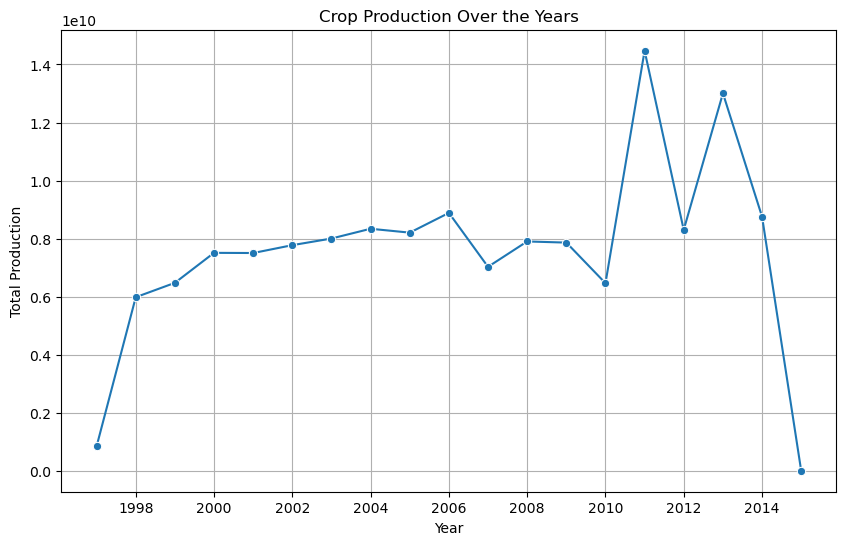

In [40]:
df['Crop_Year'] = pd.to_datetime(df['Crop_Year'], format='%Y')

# Group by year and calculate total production
yearly_production = df.groupby('Crop_Year')['Production'].sum().reset_index()

# Using Seaborn to plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_production, x='Crop_Year', y='Production', marker='o')
plt.title('Crop Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.grid(True)
plt.show()


# Average Crop Production by Season

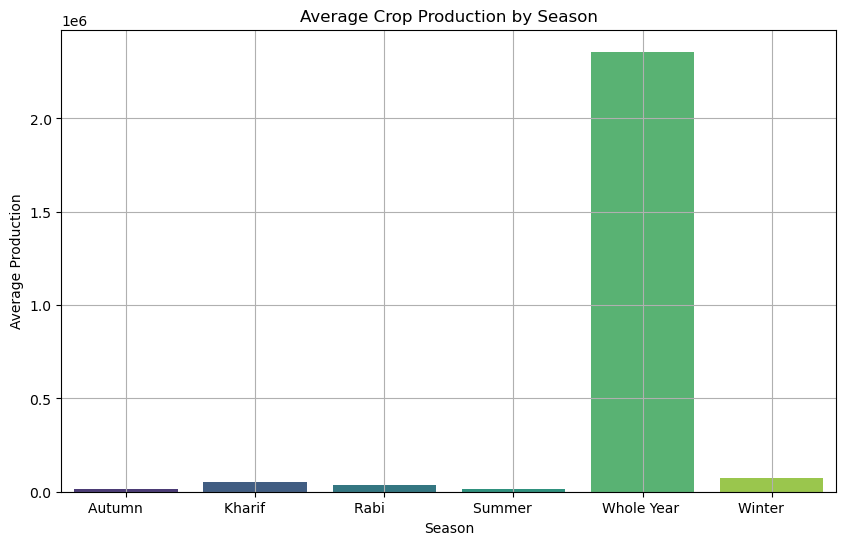

In [41]:
seasonal_avg_production = df.groupby('Season')['Production'].mean().reset_index()

# Using Seaborn to plot
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_avg_production, x='Season', y='Production', palette='viridis')
plt.title('Average Crop Production by Season')
plt.xlabel('Season')
plt.ylabel('Average Production')
plt.grid(True)
plt.show()

# Top Crops by Production

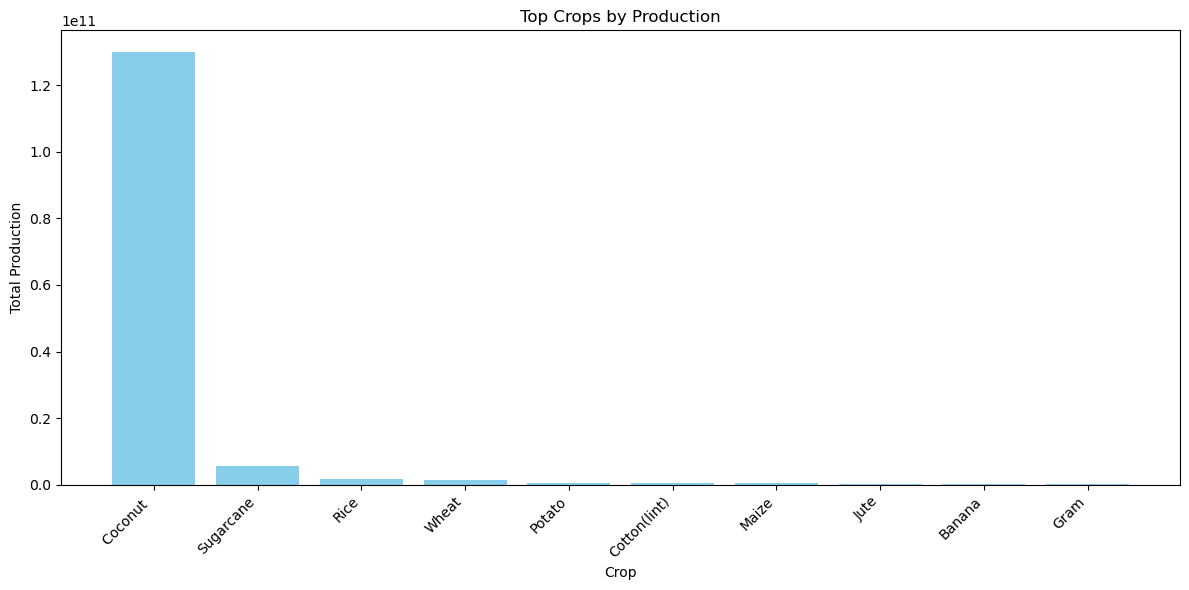

In [42]:
crop_production = df.groupby('Crop')['Production'].sum().reset_index()

# Sort by production in descending order to get the top crops

top_crops = crop_production.sort_values(by='Production', ascending=False).head(10)  

# Change '10' to the desired number of top crops

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(top_crops['Crop'], top_crops['Production'], color='skyblue')
plt.title('Top Crops by Production')
plt.xlabel('Crop')
plt.ylabel('Total Production')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

# Correlation between Area and Production

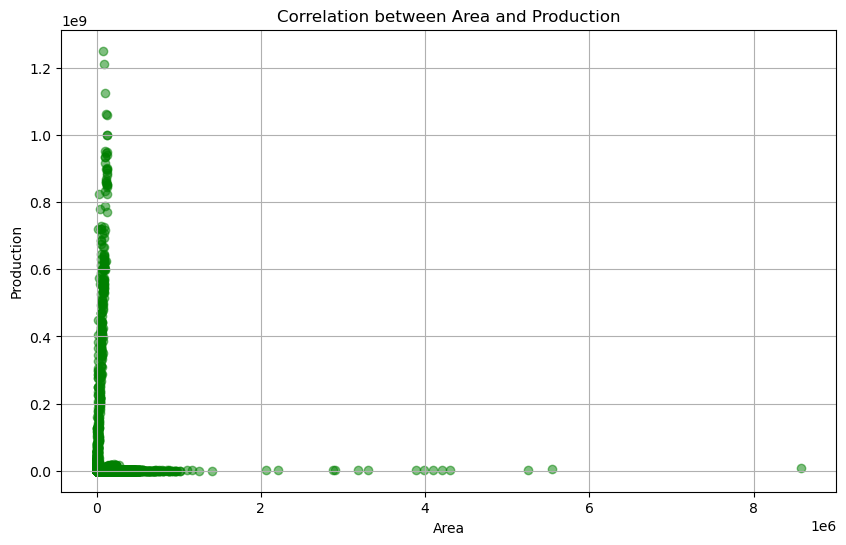

In [43]:
df_filtered = df.dropna(subset=['Area', 'Production'])

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['Area'], df_filtered['Production'], alpha=0.5, color='green')
plt.title('Correlation between Area and Production')
plt.xlabel('Area')
plt.ylabel('Production')
plt.grid(True)
plt.show()

# Total Crop Production by State

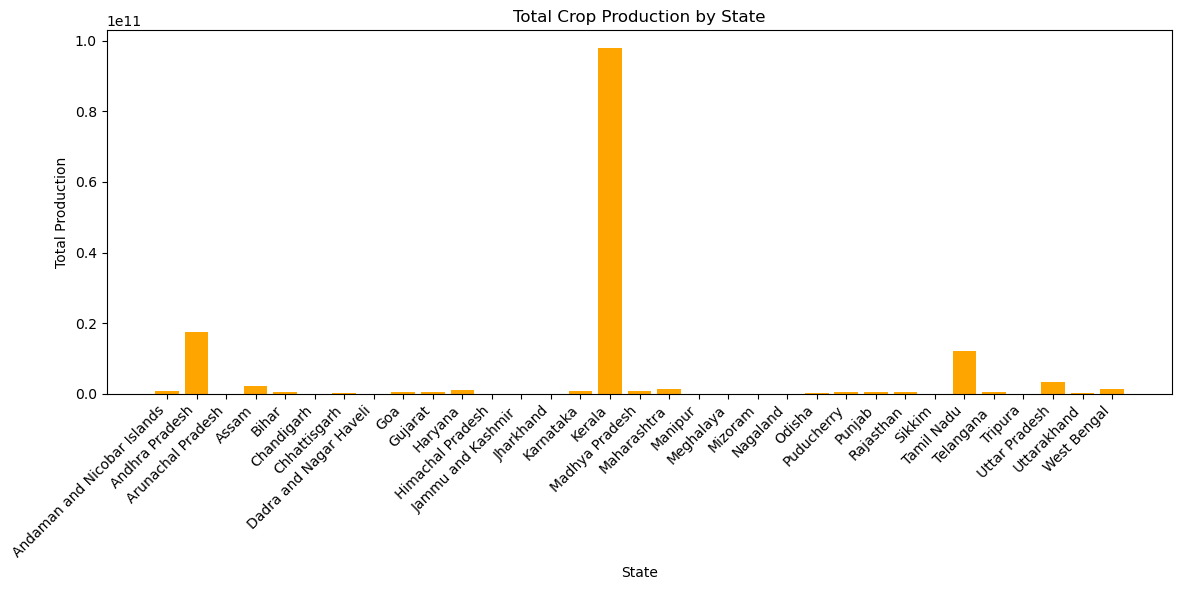

In [45]:
# Group by 'State_Name' and calculate total production for each state
state_production = df.groupby('State_Name')['Production'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(state_production['State_Name'], state_production['Production'], color='orange')
plt.title('Total Crop Production by State')
plt.xlabel('State')
plt.ylabel('Total Production')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


# Distribution of Crop Production

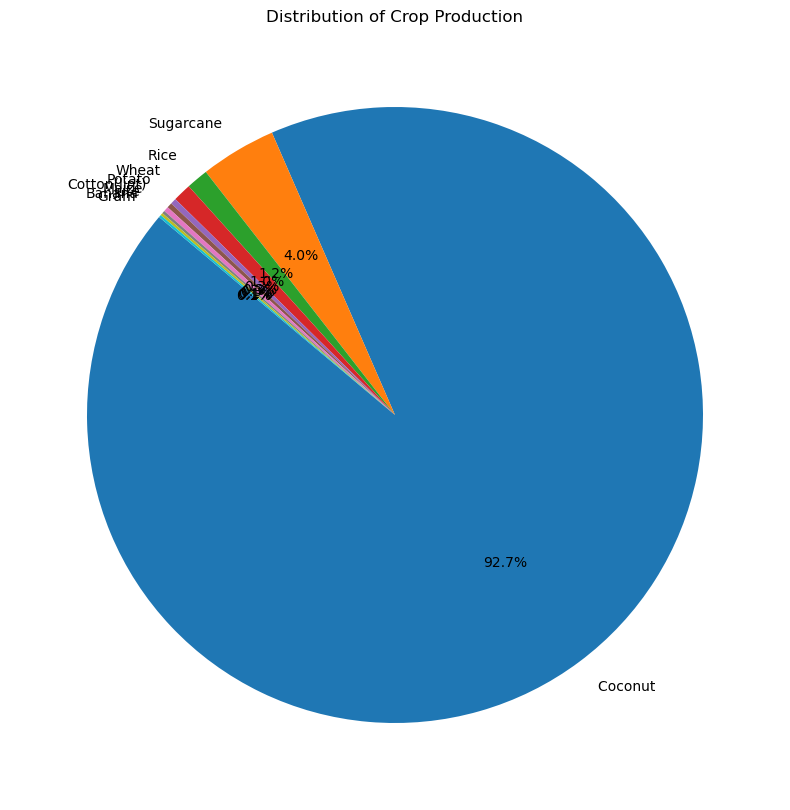

In [47]:
crop_production = df.groupby('Crop')['Production'].sum().reset_index()

# Select the top N crops for better visualization
top_crops = crop_production.nlargest(10, 'Production')  # You can adjust '10' based on your preference

# Plotting the pie chart
plt.figure(figsize=(10, 10))
plt.pie(top_crops['Production'], labels=top_crops['Crop'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Crop Production')
plt.show()